# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
import requests
import time
import pandas as pd

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    geocode_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    response = requests.get(geocode_url)

    if response.status_code == 200:
        city_weather = response.json()
        
        # Parse out latitude and longitude
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']

        # Create the forecast URL with the retrieved latitude and longitude
        city_url = url.format(lat=city_lat, lon=city_lng)

        # Log the URL, record, and set numbers
        print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

        # Run an API request for each of the cities
        try:
            # Get the forecast data
            forecast_response = requests.get(city_url)
            forecast_data = forecast_response.json()

            # Parse out max temp, humidity, cloudiness, wind speed, country, and date
            city_max_temp = forecast_data['list'][0]['main']['temp_max']
            city_humidity = forecast_data['list'][0]['main']['humidity']
            city_clouds = forecast_data['list'][0]['clouds']['all']
            city_wind = forecast_data['list'][0]['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = forecast_data['list'][0]['dt_txt']

            # Append the City information into city_data list
            city_data.append({
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })

        except Exception as e:
            print(f"Error retrieving forecast data for {city}: {e}")
            continue

        # Add 1 to the record count
        record_count += 1

    else:
        print(f"City not found: {city}. Response: {response.text}")
        continue

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Optionally print the collected city data
print(city_data)

# Convert the cities weather data into a Pandas DataFrame
if city_data:  # Check if city_data is not empty
    city_data_df = pd.DataFrame(city_data)

    # Show Record Count
    print("Record Count:")
    print(city_data_df.count())
else:
    print("No city data retrieved. Please check the API requests.")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port lincoln
Processing Record 2 of Set 1 | talnakh
Processing Record 3 of Set 1 | bonaberi
Processing Record 4 of Set 1 | nar'yan-mar
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | kalemie
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | preston
Processing Record 9 of Set 1 | wailua homesteads
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | anchorage
Processing Record 21 of Set 1 | hobyo
City not found: guelta

In [3]:
# Set the API base URL
url = api.openweathermap.org/data/2.5/forecast?lat={lats}&lon={lngs}&appid={API key}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={API_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["city"]["coord"]["lat"]
        city_lng = city_weather["city"]["coord"]["lon"]
        city_max_temp = city_weather["list"][0]["main"]["temp_max"] - 273.15  # Convert from Kelvin to Celsius
        city_humidity = city_weather["list"][0]["main"]["humidity"]
        city_clouds = city_weather["list"][0]["clouds"]["all"]
        city_wind = city_weather["list"][0]["wind"]["speed"]
        city_country = city_weather["city"]["country"]
        city_date = city_weather["list"][0]["dt_txt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kerikeri
Processing Record 2 of Set 1 | ginir
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | bam
Processing Record 5 of Set 1 | marrakesh
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | machico
Processing Record 8 of Set 1 | port lincoln
Processing Record 9 of Set 1 | howrah
Processing Record 10 of Set 1 | leava
Processing Record 11 of Set 1 | agat village
Processing Record 12 of Set 1 | pacific grove
Processing Record 13 of Set 1 | kitakata
Processing Record 14 of Set 1 | qaqortoq
Processing Record 15 of Set 1 | nadi
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | buckeye
Processing Record 21 of Set 1 | kozhevnikovo
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | p

In [4]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port lincoln,-34.7333,135.8667,289.10,70,30,3.40,AU,2024-10-26 15:00:00
1,talnakh,69.4865,88.3972,252.84,88,9,2.11,RU,2024-10-26 15:00:00
2,bonaberi,4.0779,9.6759,305.13,66,40,2.59,CM,2024-10-26 15:00:00
3,nar'yan-mar,67.6713,53.0870,275.04,96,100,6.38,RU,2024-10-26 15:00:00
4,adamstown,-25.0660,-130.1015,292.16,90,100,6.94,PN,2024-10-26 15:00:00


In [5]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [6]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port lincoln,-34.7333,135.8667,289.10,70,30,3.40,AU,2024-10-26 15:00:00
1,talnakh,69.4865,88.3972,252.84,88,9,2.11,RU,2024-10-26 15:00:00
2,bonaberi,4.0779,9.6759,305.13,66,40,2.59,CM,2024-10-26 15:00:00
3,nar'yan-mar,67.6713,53.0870,275.04,96,100,6.38,RU,2024-10-26 15:00:00
4,adamstown,-25.0660,-130.1015,292.16,90,100,6.94,PN,2024-10-26 15:00:00


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

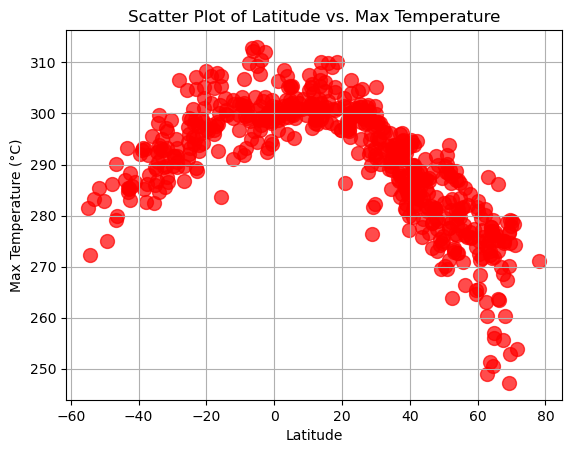

In [14]:
# Build scatter plot for latitude vs. temperature
scatter1 = city_data_df.plot.scatter(x='Lat', y='Max Temp', c='red', s=100, alpha=0.7)

# Incorporate the other graph properties
plt.title('Scatter Plot of Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

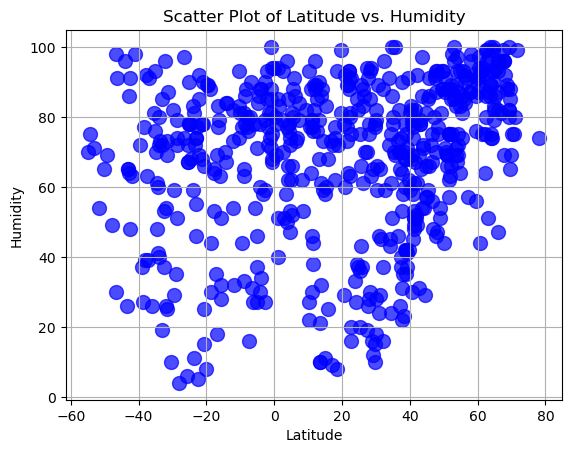

In [15]:
# Build scatter plot for latitude vs. humidity
scatter2= city_data_df.plot.scatter(x='Lat', y='Humidity', c='blue', s=100, alpha=0.7)

# Incorporate the other graph properties
plt.title('Scatter Plot of Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

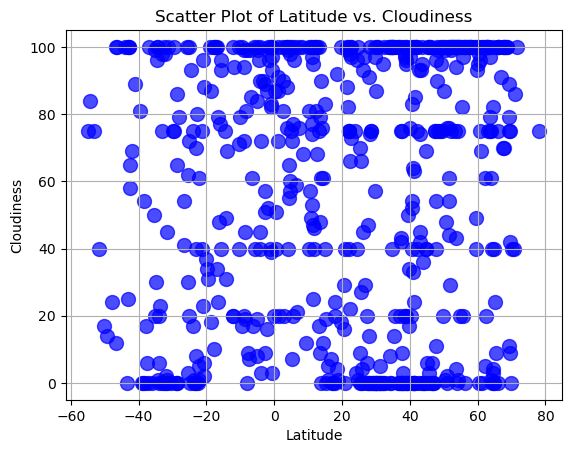

In [17]:
# Build scatter plot for latitude vs. cloudiness
scatter3 = city_data_df.plot.scatter(x='Lat', y='Cloudiness', c='blue', s=100, alpha=0.7)

# Incorporate the other graph properties
plt.title('Scatter Plot of Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

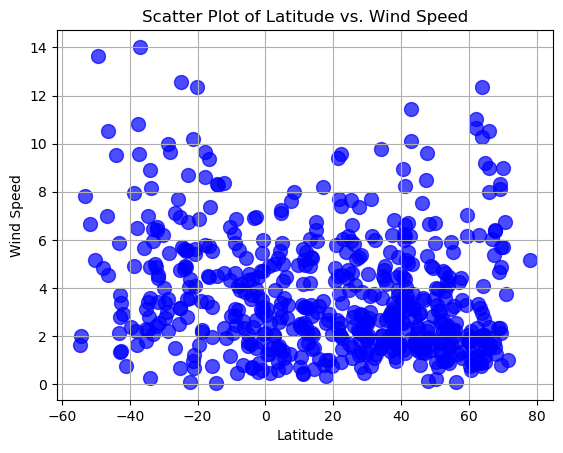

In [18]:
# Build scatter plot for latitude vs. wind speed
scatter4 = city_data_df.plot.scatter(x='Lat', y='Wind Speed', c='blue', s=100, alpha=0.7)

# Incorporate the other graph properties
plt.title('Scatter Plot of Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def create_linear_regression_plot(data, x_feature, y_feature):
    
    # Extract x and y values
    x = data[x_feature].values
    y = data[y_feature].values

    # Calculate the coefficients for the linear regression line using numpy
    slope, intercept = np.polyfit(x, y, 1)

    # Generate the regression line
    predicted = slope * x + intercept
    # Calculate R² value
    residuals = y - predicted
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Data Points', alpha=0.6)
    plt.plot(x, predicted, color='red', linewidth=2, label='Regression Line')

    # Add labels and title
    plt.title(f'Linear Regression: {y_feature} vs. {x_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend()
    plt.grid(True)

        # Display the regression equation and R² value
    equation_text = f'Equation: y = {slope:.2f}x + {intercept:.2f}'
    r_squared_text = f'R² = {r_squared:.2f}'
    plt.annotate(equation_text, xy=(0.05, 0.15), xycoords='axes fraction', fontsize=12,
                 ha='left', va='top', color='red')
    plt.annotate(r_squared_text, xy=(0.05, 0.10), xycoords='axes fraction', fontsize=12,
                 ha='left', va='top', color='red')
    # Show the plot
    plt.tight_layout()
    plt.show()


In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Display the first few rows of the Northern Hemisphere DataFrame
northern_hemisphere_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,talnakh,69.4865,88.3972,252.84,88,9,2.11,RU,2024-10-26 15:00:00
2,bonaberi,4.0779,9.6759,305.13,66,40,2.59,CM,2024-10-26 15:00:00
3,nar'yan-mar,67.6713,53.0870,275.04,96,100,6.38,RU,2024-10-26 15:00:00
7,preston,53.7667,-2.7167,287.06,71,43,4.14,GB,2024-10-26 15:00:00
8,wailua homesteads,22.0669,-159.3780,296.51,93,75,2.05,US,2024-10-26 15:00:00


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port lincoln,-34.7333,135.8667,289.10,70,30,3.40,AU,2024-10-26 15:00:00
4,adamstown,-25.0660,-130.1015,292.16,90,100,6.94,PN,2024-10-26 15:00:00
5,kalemie,-5.9475,29.1947,296.49,78,100,3.82,CD,2024-10-26 15:00:00
6,port elizabeth,-33.9180,25.5701,293.88,72,20,8.92,ZA,2024-10-26 15:00:00
9,grytviken,-54.2811,-36.5092,272.32,75,84,2.02,GS,2024-10-26 15:00:00


###  Temperature vs. Latitude Linear Regression Plot

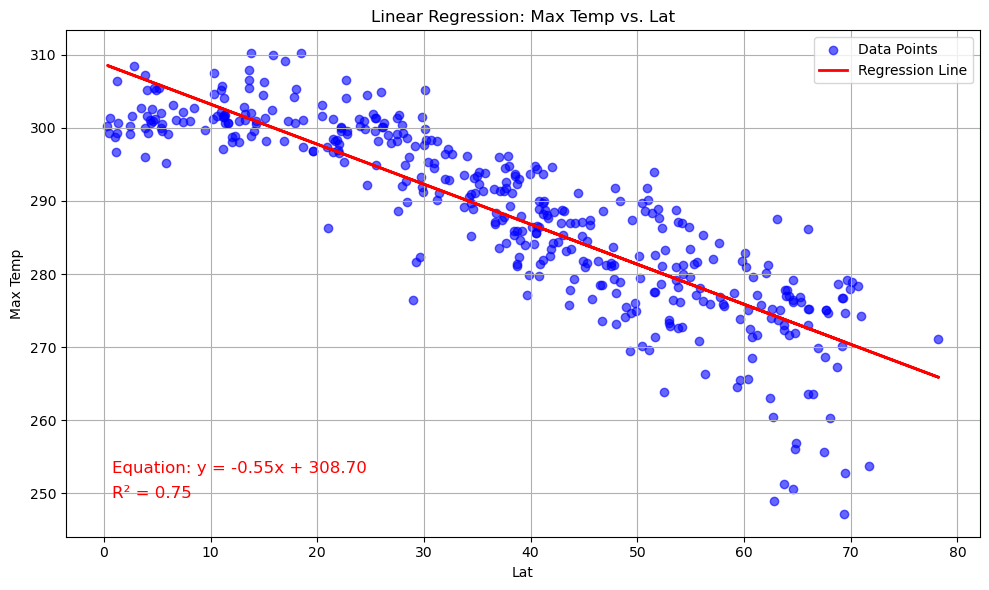

In [30]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemisphere_df, 'Lat', 'Max Temp')

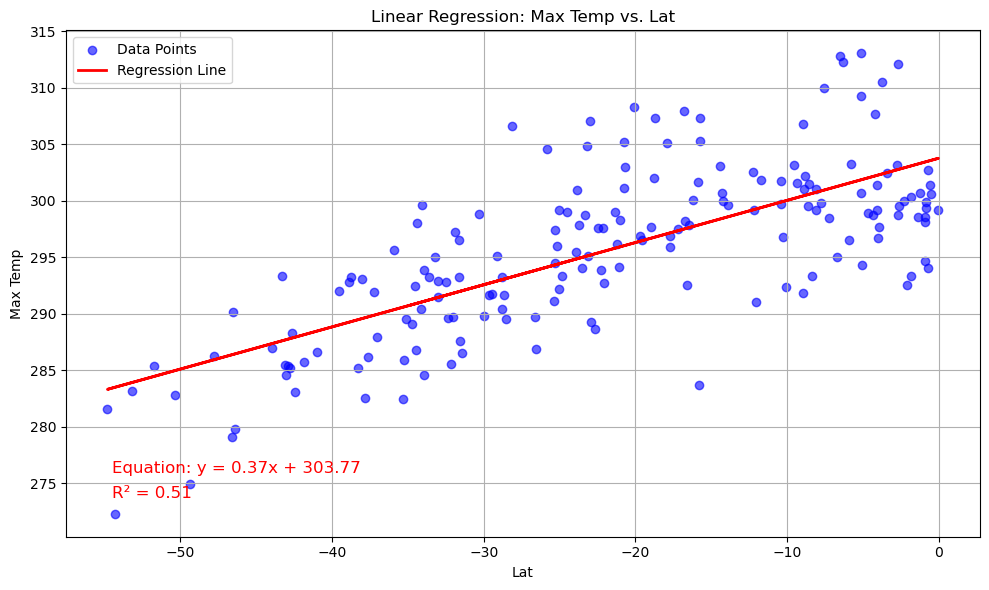

In [31]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemisphere_df, 'Lat', 'Max Temp')

**Discussion about the linear relationship:** In the northen hemisphere there is a negative correlation between the max temperature and latitude while in the southern hemisphere there is a positive correlation between max temperature and latitude. The linear equation best fits for the graph of the northern hemisphere as it has a rR^2 value of 0.75 which is better than the graph of the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

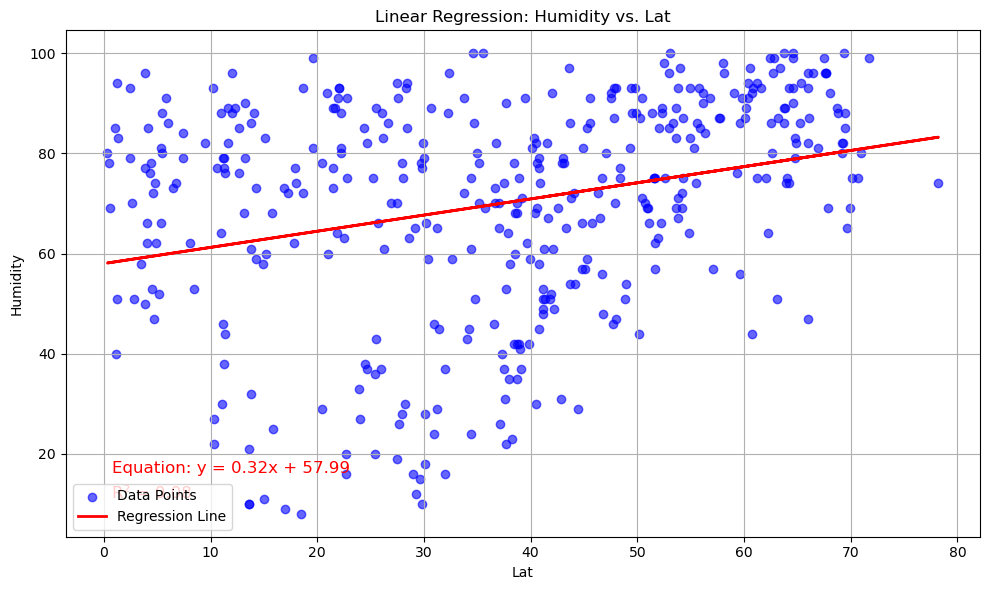

In [32]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemisphere_df, 'Lat', 'Humidity')

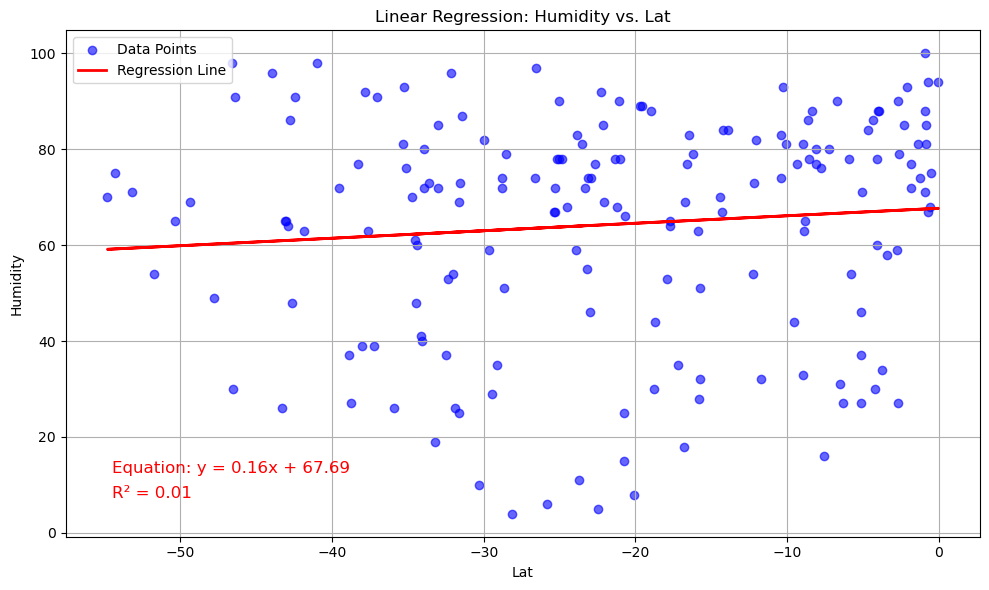

In [33]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemisphere_df, 'Lat', 'Humidity')

**Discussion about the linear relationship:** There doesn't seem to be any relationship between humidity and latitude as the r-values for each graph is less than 0.1. This means that the linear relationship is weak for each graph. 

### Cloudiness vs. Latitude Linear Regression Plot

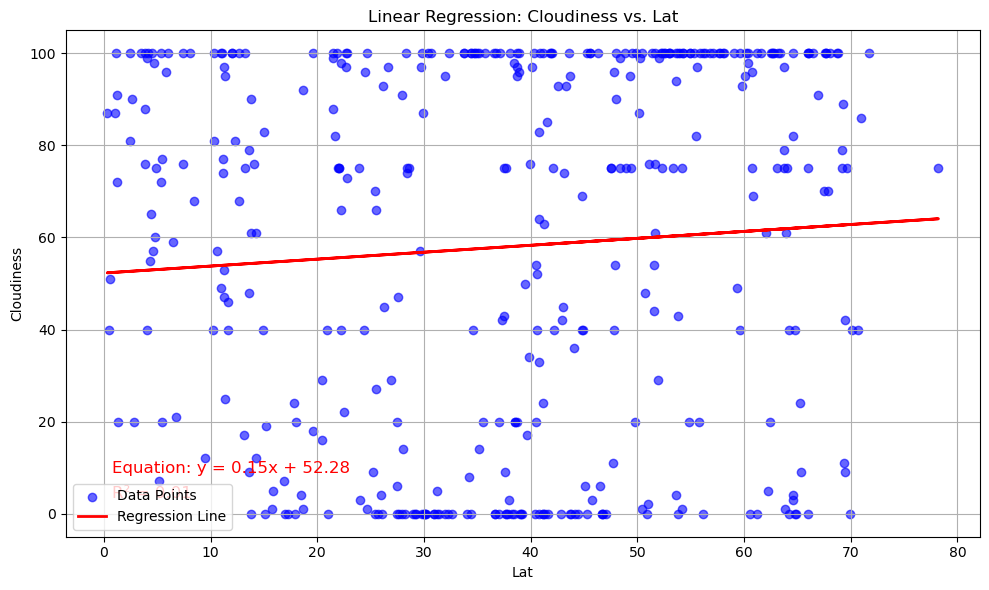

In [35]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemisphere_df, 'Lat', 'Cloudiness')

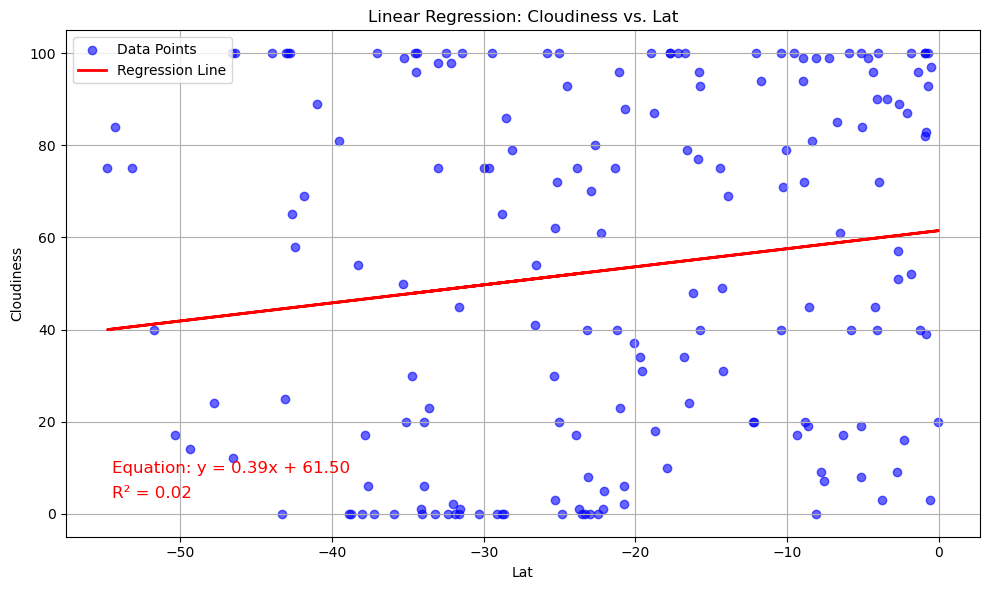

In [36]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemisphere_df, 'Lat', 'Cloudiness')

**Discussion about the linear relationship:** There doesn't seem to be any relationship between humidity and Cloudiness as the r-values for each graph is less than 0.1. This means that the linear relationship is weak for each graph.

### Wind Speed vs. Latitude Linear Regression Plot

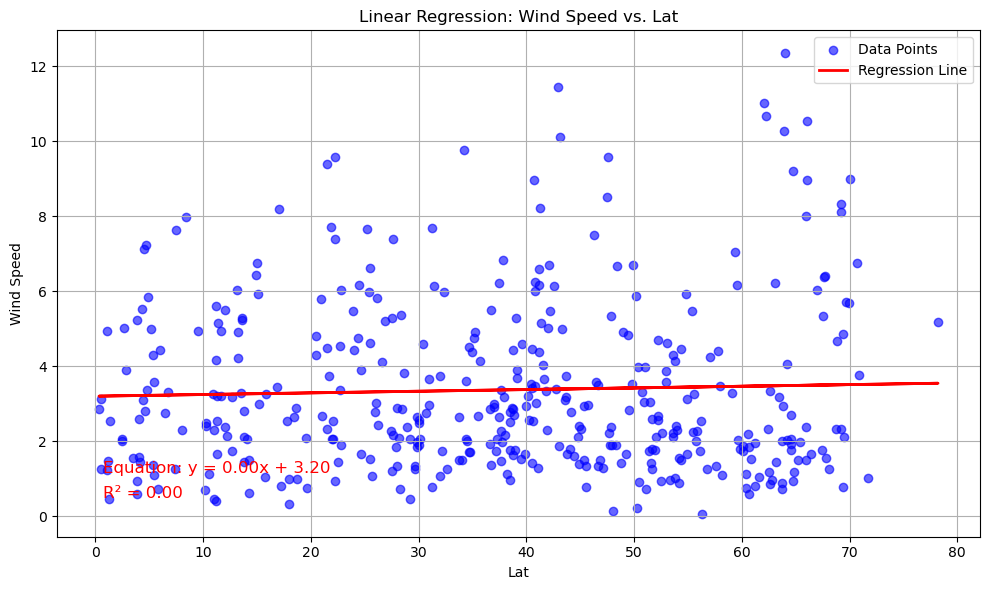

In [39]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemisphere_df, 'Lat', 'Wind Speed')

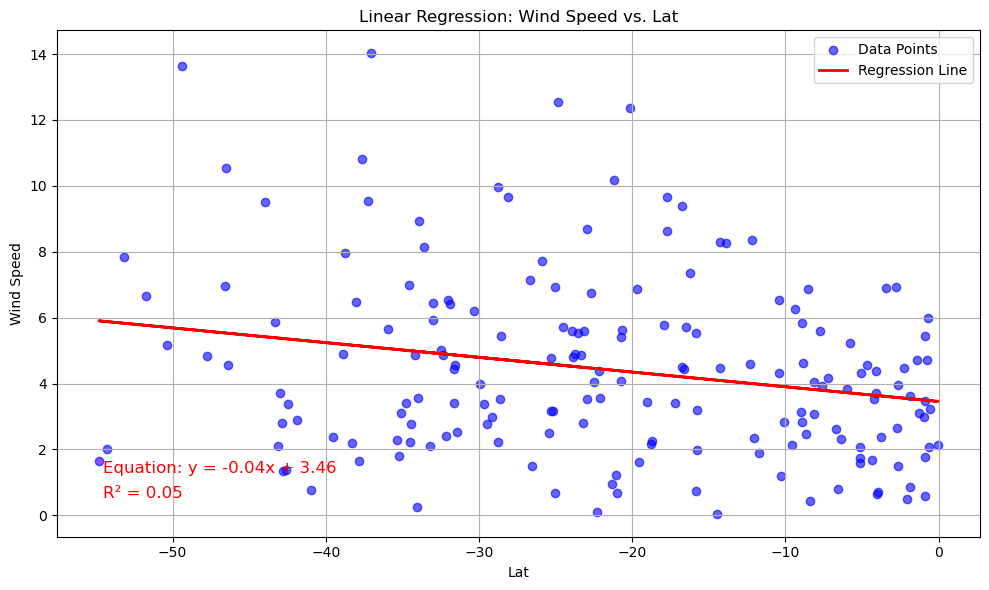

In [40]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemisphere_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:** There doesn't seem to be any relationship between humidity and Cloudiness as the r-values for each graph is less than 0.1. This means that the linear relationship is weak for each graph.